# **FINAL IMPROVEMENTS**

# **IMPELEMENTING BIDERICTIONAL LSTM**

**Loading Data-set**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving final_combined_dataset.csv to final_combined_dataset (1).csv


**IMPORT LIBRARIES**

In [ ]:
# === 1. Imports ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


**LOAD DATASET**

In [ ]:
# === 2. Load Dataset ===
df = pd.read_csv('final_combined_dataset.csv')
df['message'] = df['message'].astype(str).str.lower().str.replace(r'[^\w\s]', '', regex=True)


**Label Encoding**

In [ ]:

label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

print("Label Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


Label Mapping: {'0': np.int64(0), '1': np.int64(1), 'DDoS': np.int64(2)}


**Tokenizing and Padding**

In [ ]:
# === 4. Tokenize and Pad Sequences ===
MAX_WORDS = 10000
MAX_SEQUENCE_LENGTH = 100

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(df['message'])

sequences = tokenizer.texts_to_sequences(df['message'])
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

y = df['label_encoded']


**Train the Model**

In [ ]:
# === 5. Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# ✅ One-hot encode labels for categorical_crossentropy
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)


**Define the Model**

In [ ]:
# === 6. Define the Bidirectional LSTM Model ===
embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1
max_len = X.shape[1]

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))  # 3 classes: Normal, Attack, DDoS

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**Train the Model**

In [ ]:
# === 7. Train the Model ===
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=256,
    validation_split=0.2,
    verbose=1
)


Epoch 1/5
2121/2121 ━━━━━━━━━━━━━━━━━━━━ 1300s 610ms/step - accuracy: 0.5826 - loss: 0.6836 - val_accuracy: 0.6112 - val_loss: 0.6433
Epoch 2/5
2121/2121 ━━━━━━━━━━━━━━━━━━━━ 1330s 605ms/step - accuracy: 0.6114 - loss: 0.6412 - val_accuracy: 0.6111 - val_loss: 0.6428
Epoch 3/5
2121/2121 ━━━━━━━━━━━━━━━━━━━━ 1326s 597ms/step - accuracy: 0.6153 - loss: 0.6360 - val_accuracy: 0.6112 - val_loss: 0.6452
Epoch 4/5
2121/2121 ━━━━━━━━━━━━━━━━━━━━ 1287s 599ms/step - accuracy: 0.6144 - loss: 0.6356 - val_accuracy: 0.6115 - val_loss: 0.6473
Epoch 5/5
2121/2121 ━━━━━━━━━━━━━━━━━━━━ 1284s 600ms/step - accuracy: 0.6145 - loss: 0.6356 - val_accuracy: 0.6114 - val_loss: 0.6441


**Evaluate the Model**

5301/5301 ━━━━━━━━━━━━━━━━━━━━ 129s 24ms/step
Accuracy: 0.6111098009621734
              precision    recall  f1-score   support

           0       0.60      0.95      0.74     98400
           1       0.68      0.14      0.23     71156
        DDoS       1.00      0.97      0.98        60

    accuracy                           0.61    169616
   macro avg       0.76      0.69      0.65    169616
weighted avg       0.64      0.61      0.53    169616



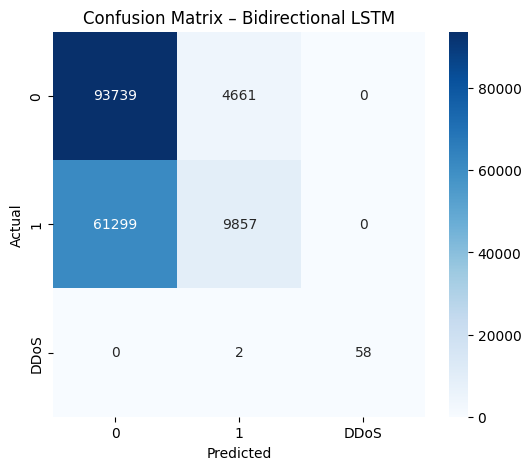

In [ ]:
# === 8. Evaluate the Model ===
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Report
print("Accuracy:", accuracy_score(y_test_labels, y_pred))
print(classification_report(y_test_labels, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Bidirectional LSTM')
plt.show()


# **CNN + LSTM Hybrid**

**CNN + LSTM Hybrid Model Implementation**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Reuse existing values
embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1
max_len = X.shape[1]

# Build the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))  # 3 output classes

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**Train the Model**

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=256,
    validation_split=0.2,
    verbose=1
)


Epoch 1/5
2121/2121 ━━━━━━━━━━━━━━━━━━━━ 978s 459ms/step - accuracy: 0.5791 - loss: 0.6846 - val_accuracy: 0.6103 - val_loss: 0.6437
Epoch 2/5
2121/2121 ━━━━━━━━━━━━━━━━━━━━ 981s 459ms/step - accuracy: 0.6103 - loss: 0.6421 - val_accuracy: 0.6064 - val_loss: 0.6431
Epoch 3/5
2121/2121 ━━━━━━━━━━━━━━━━━━━━ 973s 459ms/step - accuracy: 0.6125 - loss: 0.6386 - val_accuracy: 0.6106 - val_loss: 0.6451
Epoch 4/5
2121/2121 ━━━━━━━━━━━━━━━━━━━━ 987s 461ms/step - accuracy: 0.6151 - loss: 0.6357 - val_accuracy: 0.6065 - val_loss: 0.6510
Epoch 5/5
2121/2121 ━━━━━━━━━━━━━━━━━━━━ 988s 464ms/step - accuracy: 0.6152 - loss: 0.6352 - val_accuracy: 0.6083 - val_loss: 0.6501


**Evaluate the Model**

5301/5301 ━━━━━━━━━━━━━━━━━━━━ 87s 16ms/step
Test Accuracy: 0.6079909914159042
              precision    recall  f1-score   support

           0       0.60      0.96      0.74     98400
           1       0.70      0.12      0.20     71156
        DDoS       1.00      1.00      1.00        60

    accuracy                           0.61    169616
   macro avg       0.77      0.69      0.65    169616
weighted avg       0.64      0.61      0.51    169616



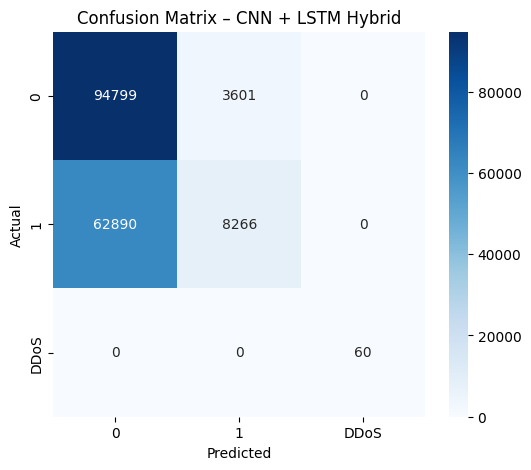

In [ ]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Test Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – CNN + LSTM Hybrid')
plt.show()


In [ ]:
model.save('cnn_lstm_model.h5')


In [ ]:
!pip install nlpaug --quiet


# **Random Word Swap Augmentation**

**Apply Random Word Swap to Class 1 Messages**

In [ ]:
import nlpaug.augmenter.word as naw

# Filter class 1 (Attack)
attack_df = df[df['label_encoded'] == 1].copy()

# Use Random Word Swap
aug = naw.RandomWordAug(action="swap")

# Augment 5000 samples (you can adjust the number)
augmented_texts = [aug.augment(text) for text in attack_df['message'][:5000]]

# Create augmented DataFrame
aug_df = pd.DataFrame({
    'message': augmented_texts,
    'label_encoded': 1,
    'label': 'Attack'
})

# Combine with original dataset
df_augmented = pd.concat([df, aug_df]).reset_index(drop=True)


**Re-tokenize and Prepare Data for Model Retraining**



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Extract messages and labels from augmented dataset
texts = df_augmented['message'].astype(str).tolist()
labels = df_augmented['label_encoded'].tolist()

# Tokenize
MAX_WORDS = 10000
MAX_SEQUENCE_LENGTH = 100

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)

# Convert to sequences and pad
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

# One-hot encode labels
y = to_categorical(labels, num_classes=3)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


**Retrain CNN + LSTM Model on Augmented Data**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Setup
embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1
max_len = X.shape[1]

# Build the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))  # 3 output classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=256,
    validation_split=0.2,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 996s 465ms/step - accuracy: 0.5788 - loss: 0.6832 - val_accuracy: 0.6124 - val_loss: 0.6406
Epoch 2/5
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 1009s 449ms/step - accuracy: 0.6144 - loss: 0.6376 - val_accuracy: 0.6128 - val_loss: 0.6393
Epoch 3/5
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 1010s 462ms/step - accuracy: 0.6156 - loss: 0.6341 - val_accuracy: 0.6130 - val_loss: 0.6391
Epoch 4/5
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 1040s 461ms/step - accuracy: 0.6161 - loss: 0.6337 - val_accuracy: 0.6126 - val_loss: 0.6471
Epoch 5/5
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 1043s 462ms/step - accuracy: 0.6165 - loss: 0.6321 - val_accuracy: 0.6130 - val_loss: 0.6413


**Evaluate the Model on the Test Set**

5332/5332 ━━━━━━━━━━━━━━━━━━━━ 89s 17ms/step
Test Accuracy: 0.6145144652318657
              precision    recall  f1-score   support

           0       0.61      0.95      0.74     98400
           1       0.70      0.15      0.25     72156
        DDoS       1.00      0.98      0.99        60

    accuracy                           0.61    170616
   macro avg       0.77      0.70      0.66    170616
weighted avg       0.65      0.61      0.53    170616



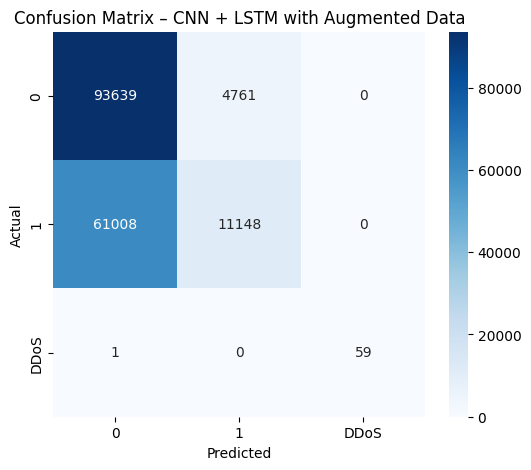

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict on test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Accuracy
print("Test Accuracy:", accuracy_score(y_true, y_pred))

# Classification Report
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – CNN + LSTM with Augmented Data')
plt.show()


# **Attention Mechanism**

**Define a Simple Attention Layer**

In [ ]:
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

class AttentionLayer(Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()

    def call(self, inputs):
        # inputs: [batch_size, time_steps, features]
        attention_weights = K.softmax(K.sum(inputs, axis=-1, keepdims=True), axis=1)
        context_vector = K.sum(attention_weights * inputs, axis=1)
        return context_vector


**Define the Attention-Enhanced Model**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Input shape
embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1
max_len = X.shape[1]

# Architecture
inputs = Input(shape=(max_len,))
x = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len)(inputs)
x = LSTM(64, return_sequences=True)(x)
x = AttentionLayer()(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(3, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_4 (Embedding)         │ (None, 100, 100)       │     8,783,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 64)        │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_layer                 │ (None, 64)             │             0 │
│ (AttentionLayer)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,829,795 (33.68 MB)

 Trainable params: 8,829,795 (33.68 MB)

 Non-trainable params: 0 (0.00 B)

**Train the Model**

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=256,
    validation_split=0.2,
    verbose=1
)


Epoch 1/5
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 798s 373ms/step - accuracy: 0.5792 - loss: 0.6887 - val_accuracy: 0.6125 - val_loss: 0.6552
Epoch 2/5
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 832s 387ms/step - accuracy: 0.6123 - loss: 0.6524 - val_accuracy: 0.6037 - val_loss: 0.6540
Epoch 3/5
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 864s 388ms/step - accuracy: 0.6157 - loss: 0.6489 - val_accuracy: 0.6130 - val_loss: 0.6533
Epoch 4/5
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 832s 390ms/step - accuracy: 0.6164 - loss: 0.6482 - val_accuracy: 0.6123 - val_loss: 0.6571
Epoch 5/5
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 805s 377ms/step - accuracy: 0.6164 - loss: 0.6485 - val_accuracy: 0.6130 - val_loss: 0.6541


**Evaluate the MODEL**



5332/5332 ━━━━━━━━━━━━━━━━━━━━ 90s 17ms/step
Test Accuracy: 0.6148485487879214
              precision    recall  f1-score   support

           0       0.61      0.95      0.74     98400
           1       0.69      0.16      0.26     72156
        DDoS       1.00      0.98      0.99        60

    accuracy                           0.61    170616
   macro avg       0.77      0.70      0.66    170616
weighted avg       0.64      0.61      0.54    170616



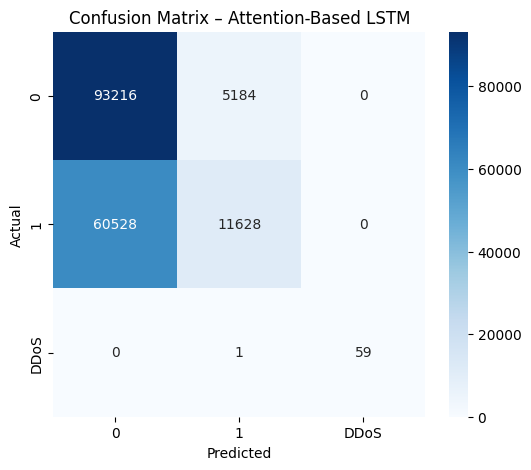

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Accuracy
print("Test Accuracy:", accuracy_score(y_true, y_pred))

# Classification Report
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Attention-Based LSTM')
plt.show()


# **Overview of Hyperparameters to Tune**
LSTM units (32–128)


Dropout rate (0.3–0.6)

Dense layer size (32–128)

Learning rate (1e-4 to 5e-3)

Batch size (128 or 256

**Setup Keras Tuner**

In [ ]:
!pip install keras-tuner --quiet
import keras_tuner as kt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


**Define Tuner Model Builder with Attention Layer**

In [ ]:
def build_model(hp):
    from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
    from tensorflow.keras.models import Model
    from tensorflow.keras.optimizers import Adam

    class AttentionLayer(tf.keras.layers.Layer):
        def __init__(self):
            super(AttentionLayer, self).__init__()

        def call(self, inputs):
            attention_weights = tf.nn.softmax(tf.reduce_sum(inputs, axis=-1, keepdims=True), axis=1)
            context_vector = tf.reduce_sum(attention_weights * inputs, axis=1)
            return context_vector

    hp_units = hp.Int('lstm_units', min_value=32, max_value=128, step=32)
    hp_dense = hp.Int('dense_units', min_value=32, max_value=128, step=32)
    hp_dropout = hp.Float('dropout', min_value=0.3, max_value=0.6, step=0.1)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-4, 5e-4, 1e-3, 5e-3])

    inputs = Input(shape=(max_len,))
    x = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len)(inputs)
    x = LSTM(hp_units, return_sequences=True)(x)
    x = AttentionLayer()(x)
    x = Dropout(hp_dropout)(x)
    x = Dense(hp_dense, activation='relu')(x)
    x = Dropout(hp_dropout)(x)
    outputs = Dense(3, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


**Run Hyperparameter Search**

In [ ]:
import tensorflow as tf


In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='attention_tuning',
    project_name='attention_lstm'
)

tuner.search(X_train, y_train, epochs=5, validation_split=0.2, batch_size=256, verbose=1)


Reloading Tuner from attention_tuning/attention_lstm/tuner0.json

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
128               |64                |lstm_units
128               |64                |dense_units
0.3               |0.3               |dropout
0.005             |0.001             |learning_rate



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 1476s 690ms/step - accuracy: 0.5726 - loss: 0.6911 - val_accuracy: 0.5765 - val_loss: 0.6868
Epoch 2/5
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 1408s 660ms/step - accuracy: 0.5766 - loss: 0.6847 - val_accuracy: 0.5765 - val_loss: 0.6850
Epoch 3/5
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 1487s 672ms/step - accuracy: 0.5760 - loss: 0.6849 - val_accuracy: 0.5765 - val_loss: 0.6856
Epoch 4/5
2133/2133 ━━━━━━━━━━━━━━━━━━━━ 1453s 668ms/step - accuracy: 0.5768 - loss: 0.6849 - val_accuracy: 0.5765 - val_loss: 0.6846
Epoch 5/5
 847/2133 ━━━━━━━━━━━━━━━━━━━━ 12:52 601ms/step - accuracy: 0.5782 - loss: 0.6841

**Retrieve Best Model and Evaluate**

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


5332/5332 ━━━━━━━━━━━━━━━━━━━━ 89s 17ms/step
Fine-Tuned Attention-LSTM Accuracy: 0.6147606320626436
              precision    recall  f1-score   support

           0       0.61      0.95      0.74     98400
           1       0.70      0.15      0.25     72156
        DDoS       1.00      0.97      0.98        60

    accuracy                           0.61    170616
   macro avg       0.77      0.69      0.66    170616
weighted avg       0.65      0.61      0.53    170616



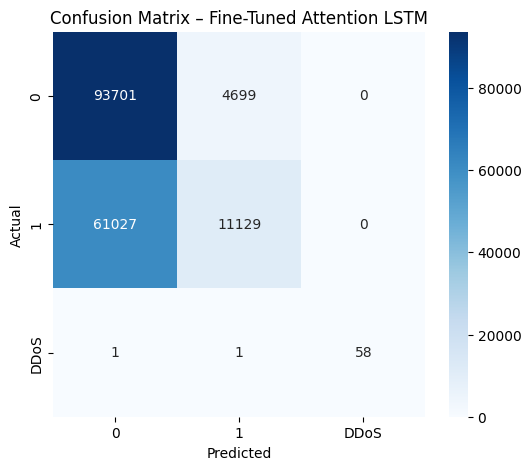

In [ ]:
# Get best model
best_model = tuner.get_best_models(1)[0]

# Predict on test data
y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print("Fine-Tuned Attention-LSTM Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Fine-Tuned Attention LSTM')
plt.show()


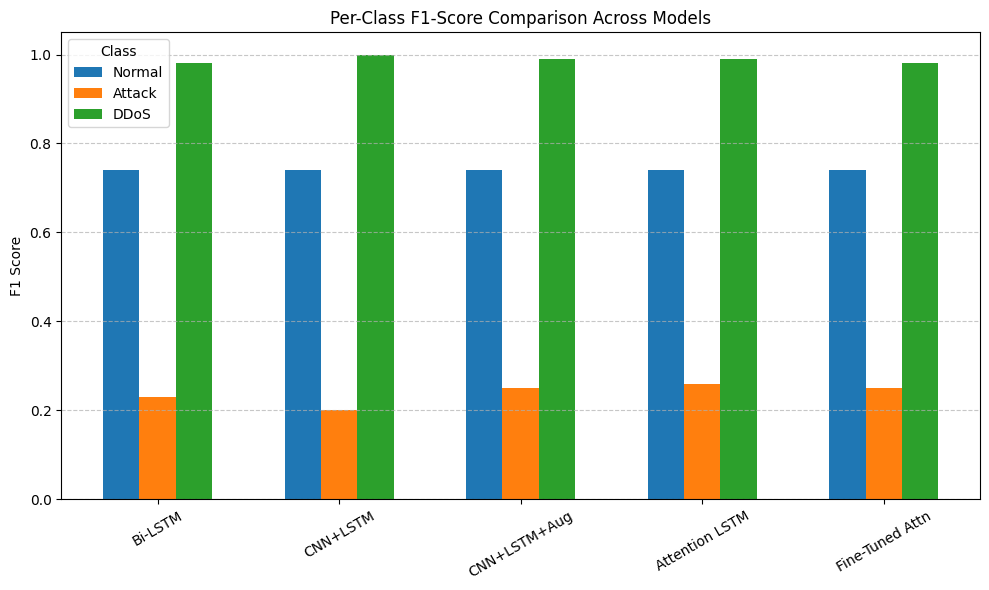

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Models
models = ['Bi-LSTM', 'CNN+LSTM', 'CNN+LSTM+Aug', 'Attention LSTM', 'Fine-Tuned Attn']


f1_scores = {
    'Normal': [0.74, 0.74, 0.74, 0.74, 0.74],
    'Attack': [0.23, 0.20, 0.25, 0.26, 0.25],
    'DDoS':   [0.98, 1.00, 0.99, 0.99, 0.98]
}

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10,6))
for i, (label, scores) in enumerate(f1_scores.items()):
    plt.bar(x + i * width, scores, width, label=label)

plt.xticks(x + width, models, rotation=30)
plt.ylabel('F1 Score')
plt.ylim(0, 1.05)
plt.title('Per-Class F1-Score Comparison Across Models')
plt.legend(title='Class')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



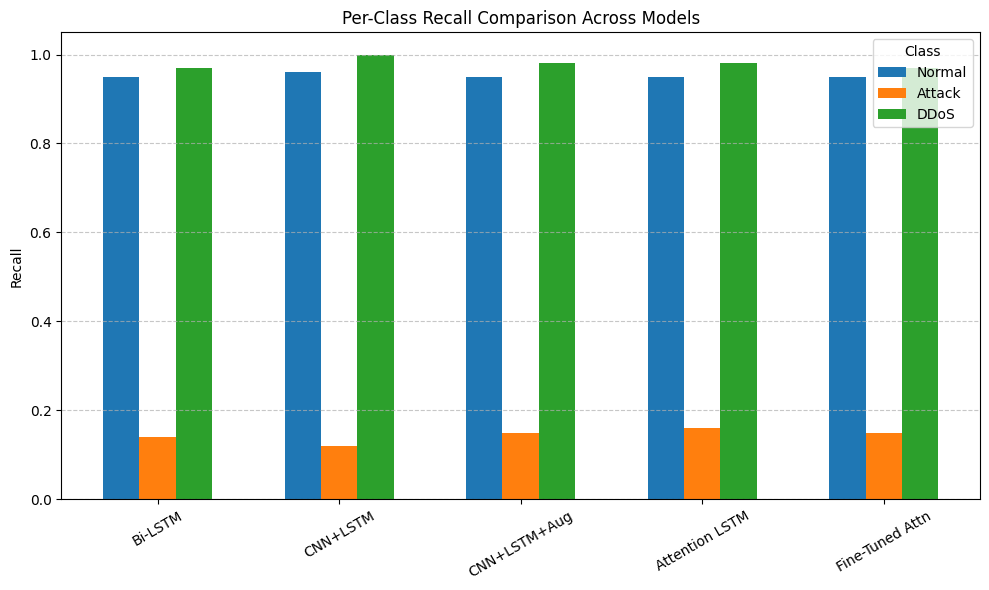

In [ ]:
recall_scores = {
    'Normal': [0.95, 0.96, 0.95, 0.95, 0.95],
    'Attack': [0.14, 0.12, 0.15, 0.16, 0.15],
    'DDoS':   [0.97, 1.00, 0.98, 0.98, 0.97]
}

plt.figure(figsize=(10,6))
for i, (label, scores) in enumerate(recall_scores.items()):
    plt.bar(x + i * width, scores, width, label=label)

plt.xticks(x + width, models, rotation=30)
plt.ylabel('Recall')
plt.ylim(0, 1.05)
plt.title('Per-Class Recall Comparison Across Models')
plt.legend(title='Class')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


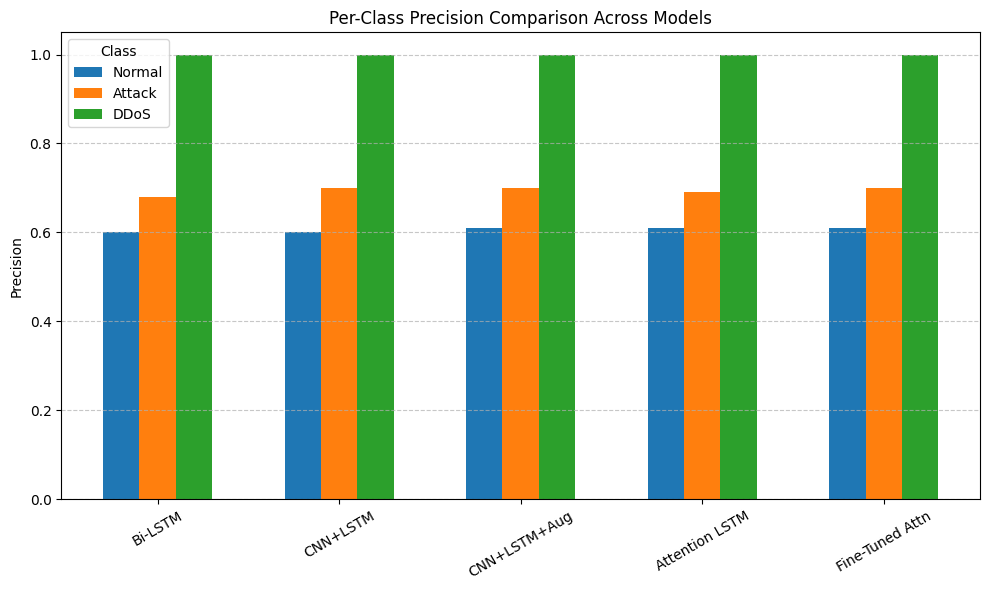

In [ ]:
precision_scores = {
    'Normal': [0.60, 0.60, 0.61, 0.61, 0.61],
    'Attack': [0.68, 0.70, 0.70, 0.69, 0.70],
    'DDoS':   [1.00, 1.00, 1.00, 1.00, 1.00]
}

plt.figure(figsize=(10,6))
for i, (label, scores) in enumerate(precision_scores.items()):
    plt.bar(x + i * width, scores, width, label=label)

plt.xticks(x + width, models, rotation=30)
plt.ylabel('Precision')
plt.ylim(0, 1.05)
plt.title('Per-Class Precision Comparison Across Models')
plt.legend(title='Class')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd

# All scores per class
data = {
    'Model': ['Bi-LSTM', 'CNN+LSTM', 'CNN+LSTM+Aug', 'Attention LSTM', 'Fine-Tuned Attn'],
    'Accuracy': [0.611, 0.608, 0.614, 0.6148, 0.6148],
    'F1_Normal': [0.74, 0.74, 0.74, 0.74, 0.74],
    'F1_Attack': [0.23, 0.20, 0.25, 0.26, 0.25],
    'F1_DDoS': [0.98, 1.00, 0.99, 0.99, 0.98],
    'Recall_Attack': [0.14, 0.12, 0.15, 0.16, 0.15],
    'Precision_Attack': [0.68, 0.70, 0.70, 0.69, 0.70],
}

df = pd.DataFrame(data)
df.set_index('Model', inplace=True)
display(df)


,Accuracy,F1_Normal,F1_Attack,F1_DDoS,Recall_Attack,Precision_Attack
Model,,,,,,
Bi-LSTM,0.6110,0.74,0.23,0.98,0.14,0.68
CNN+LSTM,0.6080,0.74,0.20,1.00,0.12,0.70
CNN+LSTM+Aug,0.6140,0.74,0.25,0.99,0.15,0.70
Attention LSTM,0.6148,0.74,0.26,0.99,0.16,0.69
Fine-Tuned Attn,0.6148,0.74,0.25,0.98,0.15,0.70


In [ ]:
baseline_f1 = df.loc['Bi-LSTM', 'F1_Attack']
df['Attack_F1_Improvement(%)'] = ((df['F1_Attack'] - baseline_f1) / baseline_f1 * 100).round(2)

baseline_recall = df.loc['Bi-LSTM', 'Recall_Attack']
df['Attack_Recall_Improvement(%)'] = ((df['Recall_Attack'] - baseline_recall) / baseline_recall * 100).round(2)

display(df)


,Accuracy,F1_Normal,F1_Attack,F1_DDoS,Recall_Attack,Precision_Attack,Attack_F1_Improvement(%),Attack_Recall_Improvement(%)
Model,,,,,,,,
Bi-LSTM,0.6110,0.74,0.23,0.98,0.14,0.68,0.00,0.00
CNN+LSTM,0.6080,0.74,0.20,1.00,0.12,0.70,-13.04,-14.29
CNN+LSTM+Aug,0.6140,0.74,0.25,0.99,0.15,0.70,8.70,7.14
Attention LSTM,0.6148,0.74,0.26,0.99,0.16,0.69,13.04,14.29
Fine-Tuned Attn,0.6148,0.74,0.25,0.98,0.15,0.70,8.70,7.14


In [ ]:
highlight = df.style.highlight_max(color='lightgreen', axis=0, subset=[
    'Accuracy', 'F1_Attack', 'Recall_Attack', 'Precision_Attack'
])
highlight


,Accuracy,F1_Normal,F1_Attack,F1_DDoS,Recall_Attack,Precision_Attack,Attack_F1_Improvement(%),Attack_Recall_Improvement(%)
Model,,,,,,,,
Bi-LSTM,0.611000,0.740000,0.230000,0.980000,0.140000,0.680000,0.000000,0.000000
CNN+LSTM,0.608000,0.740000,0.200000,1.000000,0.120000,0.700000,-13.040000,-14.290000
CNN+LSTM+Aug,0.614000,0.740000,0.250000,0.990000,0.150000,0.700000,8.700000,7.140000
Attention LSTM,0.614800,0.740000,0.260000,0.990000,0.160000,0.690000,13.040000,14.290000
Fine-Tuned Attn,0.614800,0.740000,0.250000,0.980000,0.150000,0.700000,8.700000,7.140000
